In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import MultipleLocator
import os,gzip,pickle
from keys import Cols
# 设置字体
matplotlib.rcParams['font.family'] = 'Microsoft YaHei, Times New Roman'
# 全局设置字号
plt.rcParams.update({
    'font.size': 20,  # 基础字号
    'axes.titlesize': 20,  # 标题字号
    'axes.labelsize': 20,  # 坐标轴标签字号
    'xtick.labelsize': 20,  # x轴刻度标签字号
    'ytick.labelsize': 20,  # y轴刻度标签字号
    'legend.fontsize': 18  # 图例字号
})
# 解决负号显示问题
matplotlib.rcParams['axes.unicode_minus'] = False

## 处理无模型实验数据

In [2]:
with gzip.open(
    r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_without_model-1# gzip',
    'rb'
) as f:
    df_without_model = pickle.load(f)

### 原始数据碱液流量波动过大，无模型实验过程碱液流量固定为0.33 m3/h

In [3]:
max_lye_flow = df_without_model[Cols.lye_flow].max()  # 获取实验过程碱液流量最大值
min_lye_flow = df_without_model[Cols.lye_flow].min()  # 获取实验过程碱液流量最小值
diff = df_without_model[Cols.lye_flow] - 0.33
df_without_model[Cols.lye_flow] = np.where(
    diff >= 0,  # 当diff为正或0时
    diff / ((max_lye_flow - 0.33) / 0.01) + 0.33,  # 使用第一种计算方式
    diff / ((0.33 - min_lye_flow) / 0.01) + 0.33   # 否则使用第二种计算方式
)

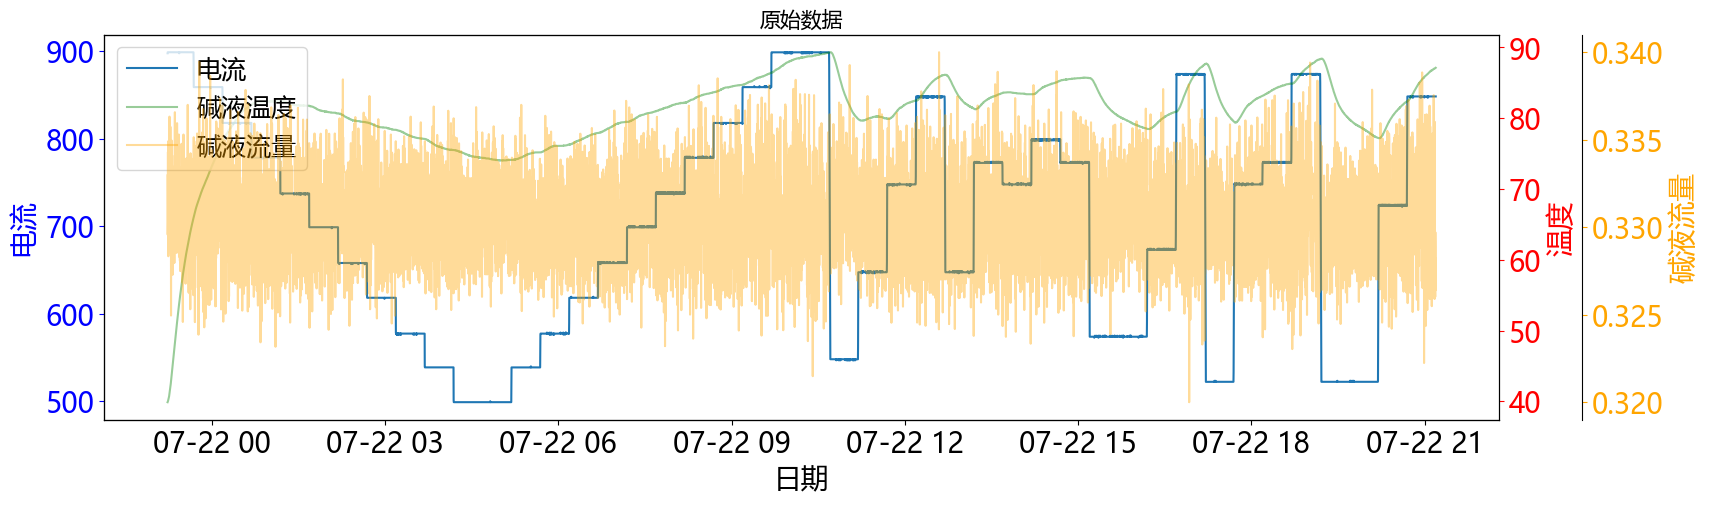

In [4]:
# 创建图表和子图
fig, ax1 = plt.subplots(figsize=(18, 5))
plt.title('原始数据', fontsize = 15)

# 绘制第一个因变量的曲线
ax1.plot(df_without_model[Cols.date_time],df_without_model[Cols.current], label = '电流')
ax1.set_xlabel('日期')
ax1.set_ylabel('电流', color='b')
ax1.tick_params('y', colors='b')

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制第二个因变量的曲线
ax2.plot(df_without_model[Cols.date_time],df_without_model[Cols.temp_out], c = 'green', alpha = 0.4, label = '碱液温度')
ax2.set_ylabel('温度', color='r')
ax2.tick_params('y', colors='r')

# 创建第三个y轴
ax3 = ax1.twinx()

# 绘制第三个因变量的曲线
ax3.plot(df_without_model[Cols.date_time],df_without_model[Cols.lye_flow], c = 'orange', alpha = 0.4, label = '碱液流量')
ax3.set_ylabel('碱液流量', color='orange')
ax3.spines['right'].set_position(('outward', 60))
ax3.tick_params('y', colors='orange')
# ax3.set_ylim(0.2, 0.5)

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# 显示图表
plt.show()

## 处理有模型实验数据

In [4]:
with gzip.open(
    r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_with_model-1# gzip',
    'rb'
) as f:
    df_with_model = pickle.load(f)

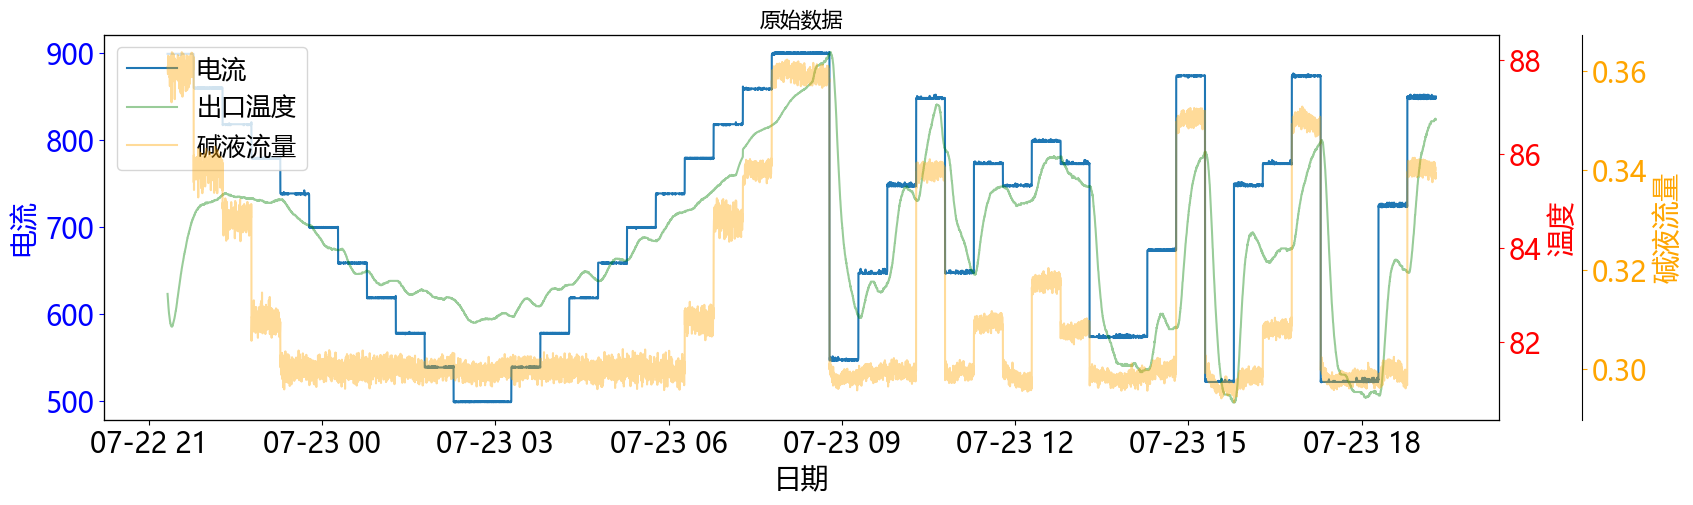

In [5]:
# 创建图表和子图
fig, ax1 = plt.subplots(figsize=(18, 5))
plt.title('原始数据', fontsize = 15)

# 绘制第一个因变量的曲线
ax1.plot(df_with_model[Cols.date_time],df_with_model[Cols.current], label = '电流')
ax1.set_xlabel('日期')
ax1.set_ylabel('电流', color='b')
ax1.tick_params('y', colors='b')

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制第二个因变量的曲线
ax2.plot(df_with_model[Cols.date_time],df_with_model[Cols.temp_out], c = 'green', alpha = 0.4, label = '出口温度')
ax2.set_ylabel('温度', color='r')
ax2.tick_params('y', colors='r')

# 创建第三个y轴
ax3 = ax1.twinx()

# 绘制第三个因变量的曲线
ax3.plot(df_with_model[Cols.date_time],df_with_model[Cols.lye_flow], c = 'orange', alpha = 0.4, label = '碱液流量')
ax3.set_ylabel('碱液流量', color='orange')
ax3.spines['right'].set_position(('outward', 60))
ax3.tick_params('y', colors='orange')

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# 显示图表
plt.show()

## 出口温度设定值稳定性

In [5]:
df_with_model[Cols.temp_out] = (df_with_model[Cols.temp_out] - 85) / 2 + 85

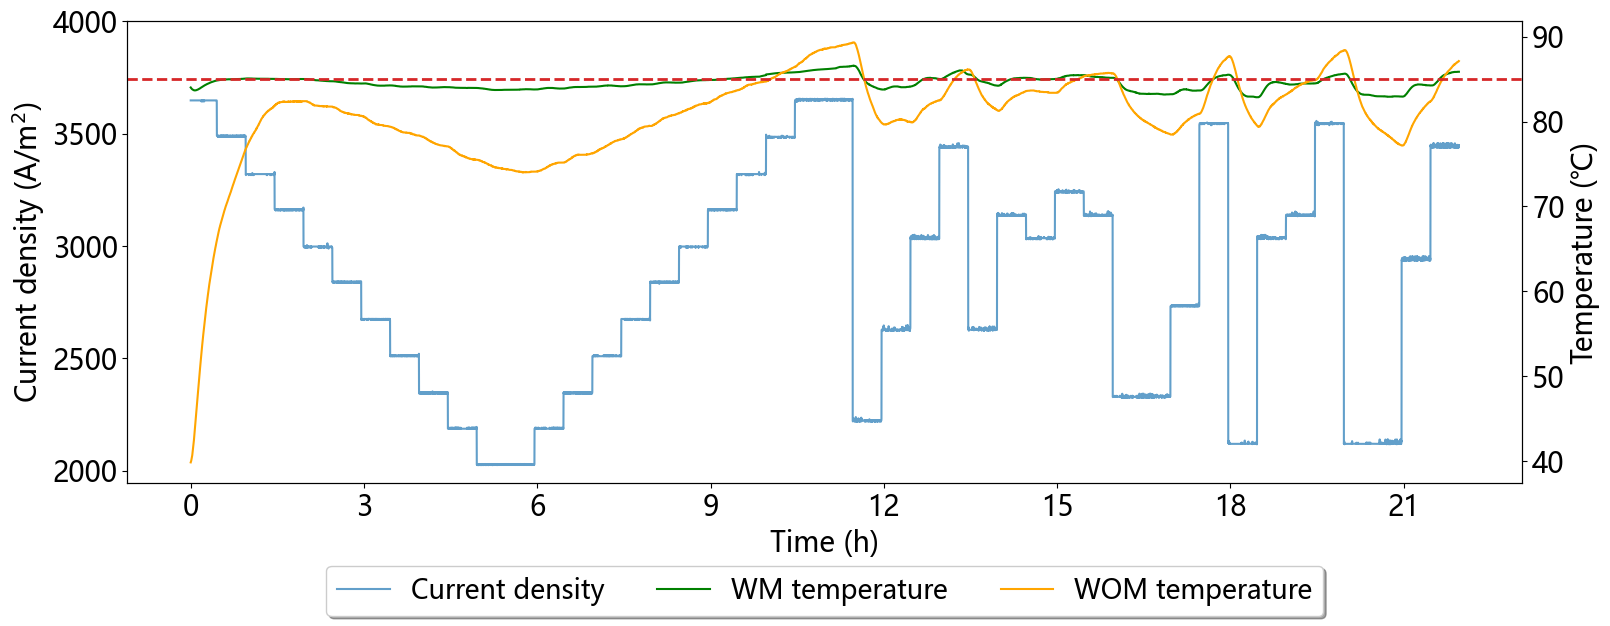

In [10]:
# 创建图表和子图
fig, ax1 = plt.subplots(figsize=(18, 6))

start_time = df_with_model[Cols.date_time].min()  # 起始时间（0点）
df_with_model['hours_since_start'] = (df_with_model[Cols.date_time] - start_time).dt.total_seconds() / 3600  # 转换为小时

# 绘制第一个因变量的曲线
ax1.plot(df_with_model['hours_since_start'],df_with_model[Cols.current_density], alpha=0.7, label = 'Current density')
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Current density (A/m$^2$)', color='black')
ax1.tick_params('y', colors='black')
ax1.set_ylim(None, 4000)

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制第二个因变量的曲线
ax2.plot(df_with_model['hours_since_start'],df_with_model[Cols.temp_out], c = 'green', label = 'WM temperature')
ax2.plot(df_with_model['hours_since_start'],df_without_model[Cols.temp_out], c = 'orange', label = 'WOM temperature')
ax2.set_ylabel('Temperature (℃)', color='black')
ax2.tick_params('y', colors='black')

ax2.axhline(
    y=85,                # 水平直线的纵坐标（平行于x轴，固定y值）
    color='#d62728',         # 线条颜色：红色
    linestyle='--',      # 线条样式：虚线（'--'表示虚线，'-'表示实线，':'表示点线）
    linewidth=2,       # 线条宽度（可选，默认1，调大更清晰）
)

# 设置x轴刻度间隔为3小时
ax = plt.gca()  # 获取当前坐标轴
ax.xaxis.set_major_locator(MultipleLocator(3))  # 间隔3小时

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center', fontsize=19,
           bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=True, fancybox=True, shadow=True)

## 单位产氢能耗对比图

### 计算单位产氢能耗

#### 计算瞬时产氢速率

In [40]:
# 定义产氢速率计算公式
f11 = 1.067e4
f12 = 101.1
f21 = 0.989
f22 = 7.641e-5

def H_production_rate(Temp_out, Lye_temp, Current_density):
   
    Temp_work = (Temp_out + Lye_temp) / 2
    yita_faraday = (Current_density ** 2 / (f11 + f12 * Temp_work + (Current_density ** 2))) * (f21 + f22 * Temp_work) * 0.97

    H_production_rate = yita_faraday * Current_density * math.pi * (560 * 1E-3 / 2) ** 2 * 31 * 3600 / 96485 / 2 * 22.4 * 1E-3

    return H_production_rate

In [41]:
for index, row in df_with_model.iterrows():
    
    df_with_model.at[index, Cols.H_production_rate] = H_production_rate(row[Cols.temp_out], row[Cols.lye_temp], row[Cols.current_density])

for index, row in df_without_model.iterrows():
    
    df_without_model.at[index, Cols.H_production_rate] = H_production_rate(row[Cols.temp_out], row[Cols.lye_temp], row[Cols.current_density])

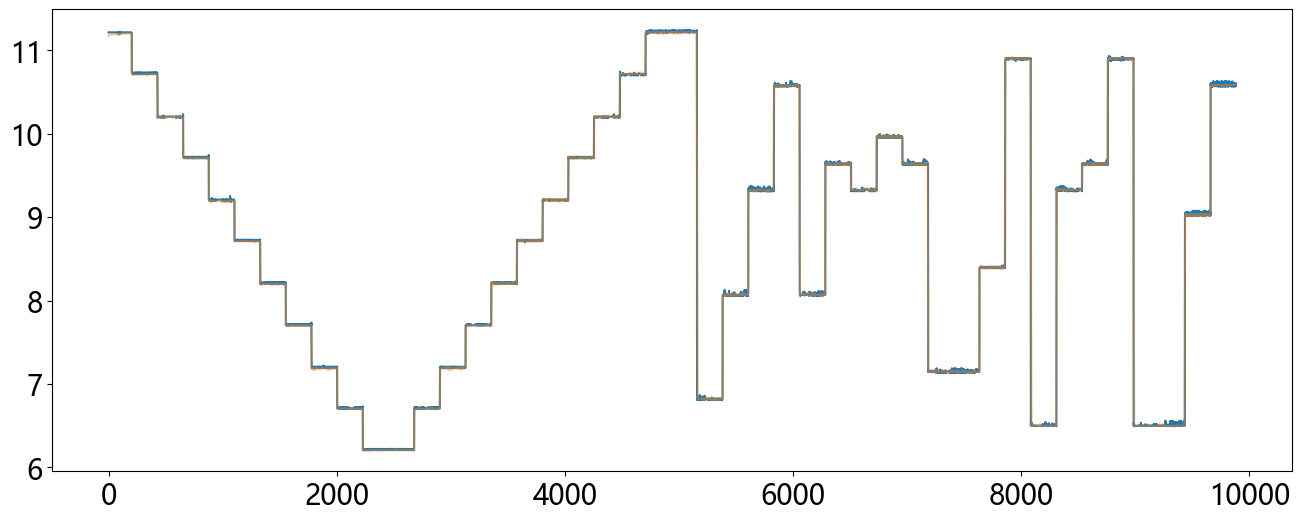

In [42]:
plt.figure(figsize=(16,6))
plt.plot(df_with_model[Cols.H_production_rate])
plt.plot(df_without_model[Cols.H_production_rate], alpha = 0.5)

In [43]:
# 计算能耗
power_ele = df_with_model[Cols.current] * df_with_model[Cols.voltage]
power_pump = (df_with_model[Cols.lye_flow] / 0.5) **3 * 2.2 * 1E3
power_cooling = (df_with_model[Cols.temp_out] - df_with_model[Cols.lye_temp]) * df_with_model[Cols.lye_flow] * 1.328 * 1E6 / 3600 * 3.2

df_with_model['power'] = power_ele + power_pump + power_cooling * 1E-3  # 单位转换为KW

# 计算能耗
power_ele = df_without_model[Cols.current] * df_without_model[Cols.voltage]
power_pump = (df_without_model[Cols.lye_flow] / 0.5) **3 * 2.2 * 1E3
power_cooling = (df_without_model[Cols.temp_out] - df_without_model[Cols.lye_temp]) * df_without_model[Cols.lye_flow] * 1.328 * 1E6 / 3600 * 3.2

df_without_model['power'] = power_ele + power_pump + power_cooling * 1E-3  # 单位转换为KW

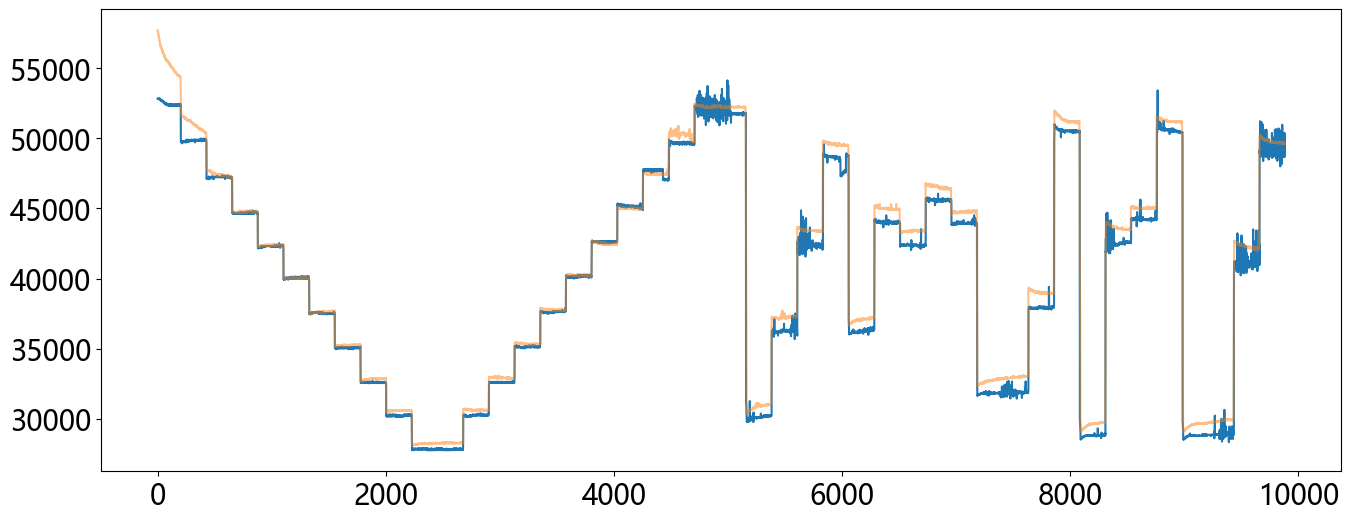

In [44]:
plt.figure(figsize=(16,6))
plt.plot(df_with_model['power'])
plt.plot(df_without_model['power'], alpha = 0.5)

In [45]:
df_with_model['power_per_H'] = df_with_model['power'] / df_with_model[Cols.H_production_rate]
df_without_model['power_per_H'] = df_without_model['power'] / df_without_model[Cols.H_production_rate]

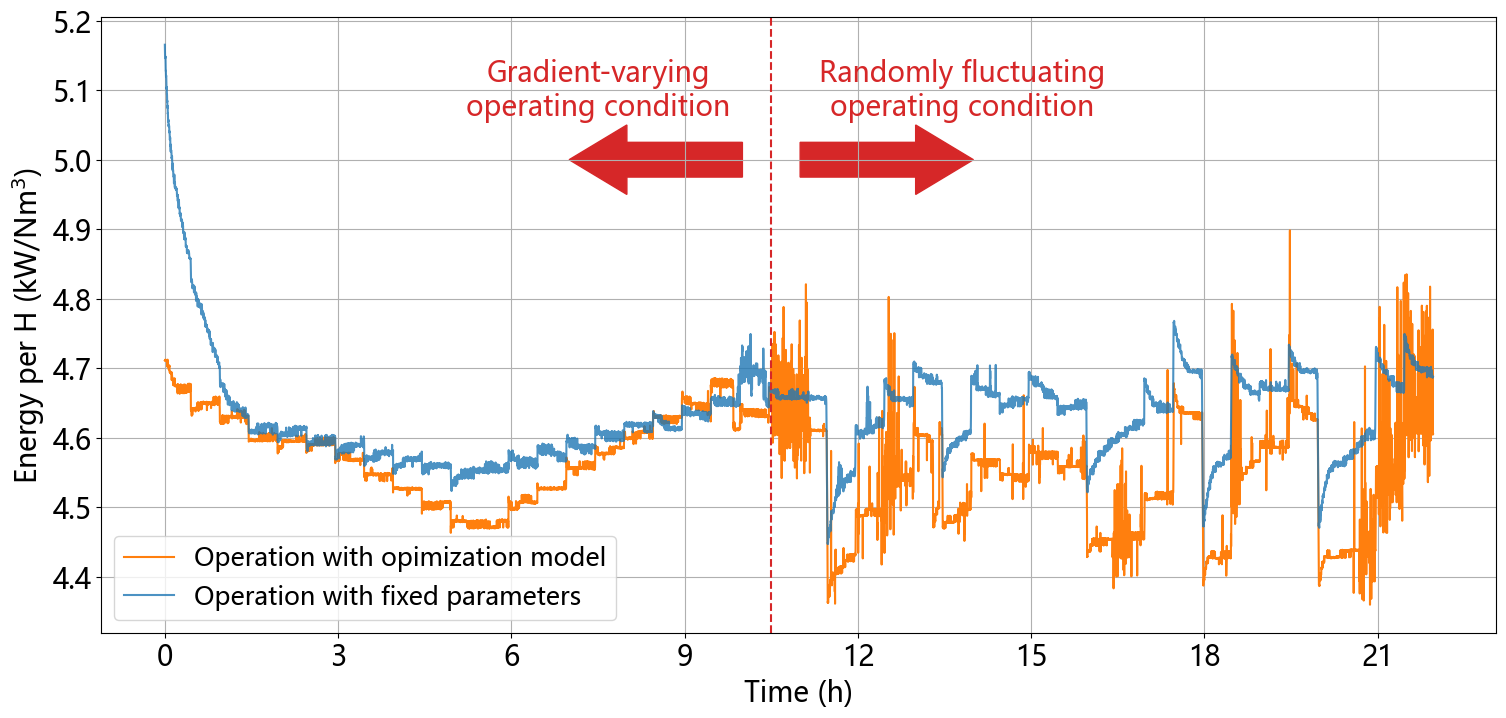

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(df_with_model['hours_since_start'], df_with_model['power_per_H'] / 1E3, c='#ff7f0e', label = 'Operation with opimization model')
plt.plot(df_with_model['hours_since_start'], df_without_model['power_per_H'] / 1E3, c="#1f77b4", alpha = 0.8, label = 'Operation with fixed parameters')
plt.axvline(x=10.5, color='#d62728', linestyle='--', linewidth=1.5,)

plt.arrow(
    10, 5,          # 箭头起点坐标
    -2, 0,         # 箭头在x和y方向上的长度（终点 = 起点 + 长度）
    width=0.05,    # 箭头宽度
    head_width=0.1, # 箭头头部宽度
    head_length=1, # 箭头头部长度
    fc='#d62728',      # 箭头填充色
    ec='#d62728'       # 箭头边缘色
)

plt.arrow(
    11, 5,  # 箭头起点坐标
    2, 0,  # 箭头在x和y方向上的长度（终点 = 起点 + 长度）
    width=0.05,  # 箭头宽度
    head_width=0.1,  # 箭头头部宽度
    head_length=1,  # 箭头头部长度
    fc='#d62728',  # 箭头填充色
    ec='#d62728'  # 箭头边缘色
)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(3))

plt.xlabel('Time (h)')
plt.ylabel('Energy per H (kW/Nm$^3$)', color='black')

plt.text(7.5, 5.1, 'Gradient-varying\noperating condition', va='center', ha='center', color = '#d62728', fontsize=20)
plt.text(13.8, 5.1, 'Randomly fluctuating\noperating condition', va='center', ha='center', color = '#d62728', fontsize=20)

plt.legend()
plt.grid(True)

## 数据处理

In [207]:
df_111 = pd.read_excel(r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_with_model.xlsx')

### 碱液流量向目标靠拢

In [208]:
for index, row in df_111.iterrows():

    # 判断电流范围
    if row['1#电流设定'] < 750:
        df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.3) / 2
    elif row['1#电流设定'] < 790:
        df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.31) / 2
    elif row['1#电流设定'] < 810:
        df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.32) / 2
    elif row['1#电流设定'] < 830:
        df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.33) / 2
    elif row['1#电流设定'] < 870:
        df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.34) / 2
    elif row['1#电流设定'] < 880:
        df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.35) / 2
    else:
        df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.36) / 2

In [209]:
for i in range(2):

    for index, row in df_111.iterrows():
        if index < 4499:
            # 判断电流范围
            if row['1#电流设定'] < 750:
                df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.3) / 2
            elif row['1#电流设定'] < 790:
                df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.31) / 2
            elif row['1#电流设定'] < 810:
                df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.32) / 2
            elif row['1#电流设定'] < 830:
                df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.33) / 2
            elif row['1#电流设定'] < 870:
                df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.34) / 2
            elif row['1#电流设定'] < 880:
                df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.35) / 2
            else:
                df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.36) / 2


In [210]:
for index, row in df_111.iterrows():
    if index >= 4499:

        # 判断电流范围
        if row['1#电流设定'] < 750:
            df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.3) / 2 - 0.005
        elif row['1#电流设定'] < 790:
            df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.31) / 2 - 0.003
        elif row['1#电流设定'] < 810:
            df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.32) / 2
        elif row['1#电流设定'] < 830:
            df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.33) / 2
        elif row['1#电流设定'] < 870:
            df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.34) / 2 + 0.004
        elif row['1#电流设定'] < 880:
            df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.35) / 2 + 0.004
        else:
            df_111.at[index, Cols.lye_flow] = (row[Cols.lye_flow] + 0.36) / 2 + 0.004

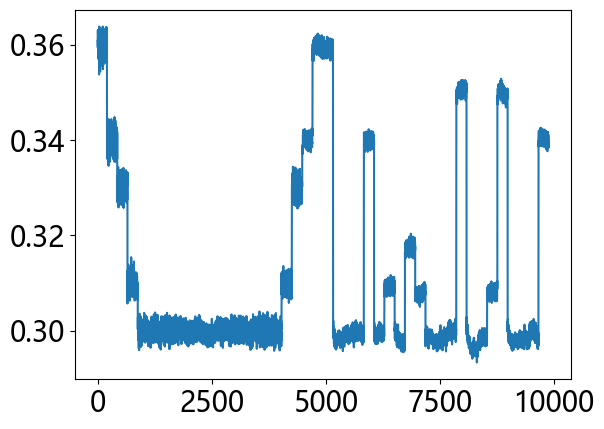

In [211]:
plt.plot(df_111[Cols.lye_flow])

### 保存为新的excel和gzip文件

In [212]:
target_folder = r'D:\Devs\Single_Stack_MLJ\data\processed'

In [213]:
with gzip.open(
    os.path.join(
        target_folder,
        'Static_Model_Verification_with_model-1# gzip'
    ),'wb'
) as f:
    pickle.dump(df_111,f)

In [214]:
df_with_model.to_excel(
    os.path.join(
        target_folder,
        'Static_Model_Verification_with_model.xlsx'
    )
)